In [1]:
import numpy as np
import astropy.io.fits as fits 
import matplotlib.pyplot as plt
from scipy import ndimage
import random
from scipy.optimize import leastsq
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM

In [2]:
hdu = fits.open('HE0232-0900.wo_absorption.fits')
#hdu.info()
qso_data = hdu[0].data
qso_error = hdu[1].data
qso_header = hdu[0].header
wavestart = qso_header['CRVAL3']
wavint = qso_header['CD3_3']
#wave = wavestart+np.arange(qso_data.shape[0])*wavint. This is the same as the one below. 
[central_x,central_y]= [67,51]#

In [3]:
z = 0.043143
k = 1+z

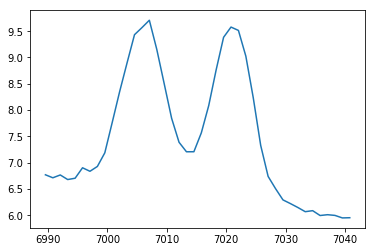

In [4]:
wave = np.arange(wavestart,(wavestart+(wavint*qso_data.shape[0])),wavint)#start,stop,step
select =(wave>6700*k)&(wave<6750*k)
x = wave[select]
y = qso_data[:,51,67][select]
y_err = qso_error[:,51,67][select]
plt.plot(x,y)
plt.show()

In [5]:
from profile_fitting_HE0232_0900_SII import *

In [6]:
#x0=[2,12942,10,23,12942,10,10,12942,10,15,12742,10,5,5,12942,10,12,12,12742,12,1,1]
x0=[8,12942,10,20,12942,20,5,12942,3,9.99,12742,4,5,5,12942,15,10,10,12742,10,5,5]
popt,pcov = leastsq(full_gauss3,x0,args = (x,y,y_err),maxfev=10000000)
print(popt)
[amp_Ha,vel_Ha,vel_sigma_Ha,amp_NI,vel_NI,vel_sigma_NI,amp_N6583,vel_N6583,vel_N6583_sigma,amp_N6583_br,vel_N6583_br,vel_N6583_sigma_br,amp_S6716,amp_S6731,vel_S6716,vel_S6716_sigma,amp_S6716_br,amp_S6731_br,vel_S6716_br,vel_S6716_sigma_br,m,c] = popt
fit=full_gauss3(popt,x,y,y_err)*y_err+y
residual=y-fit

[  8.00000000e+00   1.29420000e+04   1.00000000e+01   2.00000000e+01
   1.29420000e+04   2.00000000e+01   5.00000000e+00   1.29420000e+04
   3.00000000e+00   9.99000000e+00   1.27420000e+04   4.00000000e+00
   1.55162805e+00   3.34914689e+00   1.29263228e+04   1.40769466e+02
  -1.68114548e-01   1.61240371e+00   1.23014133e+04   1.57909004e+02
  -1.93324025e+01   1.42057223e+02]


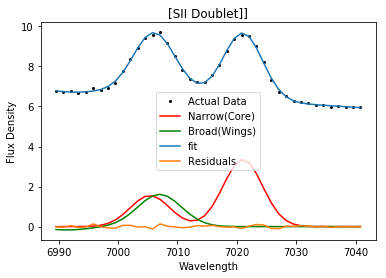

In [7]:
plt.plot(x,y,'ko',markersize=2,label='Actual Data')
plt.plot(x,SII_doublet_gauss(x,amp_S6716,amp_S6731,vel_S6716,vel_S6716_sigma),'-r',label = 'Narrow(Core)')
plt.plot(x,SII_doublet_gauss(x,amp_S6716_br,amp_S6731_br,vel_S6716_br,vel_S6716_sigma_br),'-g',label='Broad(Wings)')

plt.plot(x,fit,label='fit')
plt.plot(x,residual,label='Residuals')

plt.title('[SII Doublet]]')
plt.xlabel('Wavelength')
plt.ylabel('Flux Density')
plt.legend()
plt.show()
#Wings have high veloicty dispersion and they should have broader components/are broader. At the core, the velocity is relatively constant and the they should be narrow. 

In [8]:
from muse import *

In [9]:


def full_gauss(p,wave,data,error):
    (amp_SII6716,amp_SII6731,vel_SII6731,vel_sigma_SII6731,amp_SII6716_br,amp_SII6731_br,vel_SII6731_br,vel_sigma_SII6731_br,m,c)=p
    narrow_SII = SII_doublet_gauss(wave,amp_SII6716,amp_SII6731,vel_SII6731,vel_sigma_SII6731)
    broad_SII = SII_doublet_gauss(wave,amp_SII6716_br,amp_SII6731_br,vel_SII6731_br,vel_sigma_SII6731_br)
    cont = (wave/1000.)*m+c
    return (narrow_SII+broad_SII+cont-data)/error

In [10]:
#p_init=(2.83622660e+00,3.42965891e+00,1.29255590e+04,1.45217922e+02,1.88312790e-01,8.03182732e-01,1.24078411e+04,1.40669005e+02,-1.27882152e+01,9.60099374e+01)
x0=[3,3,12942,5,0.2,0.8,12742,10,5,5]

In [11]:
popt,pcov = leastsq(full_gauss,x0,args=(x,y,y_err),maxfev=1000000)
print(popt)
[amp_SII6716,amp_SII6731,vel_SII6731,vel_sigma_SII6731,amp_SII6716_br,amp_SII6731_br,vel_SII6731_br,vel_sigma_SII6731_br,m,c] = popt
fit = full_gauss(popt,x,y,y_err)*y_err+y
residual = y - fit
#Vel_br is higer than vel, which means there's a redshift. This is wrong because we can't see the redhift component due to dust obscuration. 

[  3.27195400e+00   3.47167235e+00   1.29416720e+04   1.61997428e+02
   3.50750751e-01   1.80754701e+01   1.42838769e+04   1.54545630e+02
  -2.29336511e+01   1.67076092e+02]


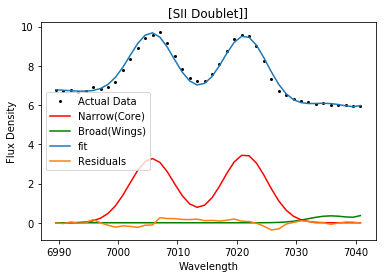

In [12]:
plt.plot(x,y,'ko',markersize=2,label='Actual Data')
plt.plot(x,SII_doublet_gauss(x,amp_SII6716,amp_SII6731,vel_SII6731,vel_sigma_SII6731),'-r',label = 'Narrow(Core)')
plt.plot(x,SII_doublet_gauss(x,amp_SII6716_br,amp_SII6731_br,vel_SII6731_br,vel_sigma_SII6731_br),'-g',label='Broad(Wings)')

plt.plot(x,fit,label='fit')
plt.plot(x,residual,label='Residuals')

plt.title('[SII Doublet]]')
plt.xlabel('Wavelength')
plt.ylabel('Flux Density')
plt.legend()
plt.show()
#Wings have high veloicty dispersion and they should have broader components/are broader. At the core, the velocity is relatively constant and the they should be narrow. 

In [13]:
ratio_core = (amp_SII6731/amp_SII6716)
ratio_wing = (amp_SII6731_br/amp_SII6716_br)
print(ratio_core,ratio_wing)

1.06103947435 51.5336605335


In [14]:
vel_offset = vel_SII6731 - vel_SII6731_br
print(vel_offset)

-1342.2049389


In [16]:
#print("W80: ",w80)
#print("\nv5: ",v5)

If the gas density is low (<
∼ 100/cc), the [S II] flux ratio
(6717°A/6731 °A) is about 1.4–1.45. When the density exceeds
∼ 10^(3.5)/cc, the [S II] flux ratio becomes ∼0.44–0.5 (e.g.,
Sanders et al. 2016). By the 2-component fit, we estimate the
brighter component has the density of about 300/cc, similar to
a typical density in NLRs of AGNs. On the other hand, the
outflowing component is very dense, > 3000/cc.